In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing
import wrangle

from sklearn.model_selection import train_test_split
from scipy import stats

# Exercises

Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.



## Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .


Number of observations removed: 239823


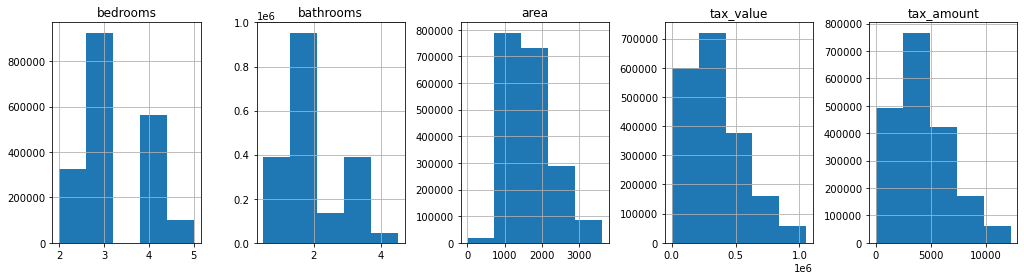

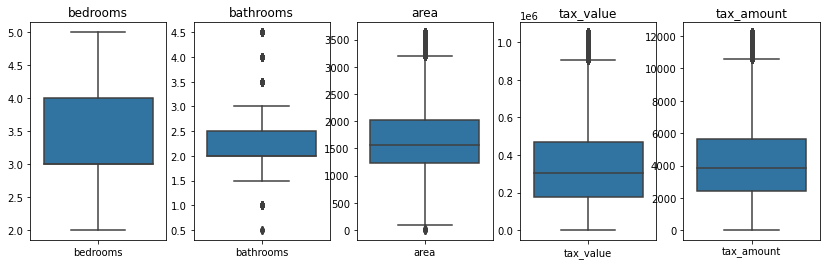

In [2]:
train, validate, test = wrangle.wrangle_zillow()

In [3]:
train.shape, validate.shape, test.shape

((1071302, 7), (459130, 7), (382609, 7))

### Min Max Scaler

In [4]:
#create scaler object
scaler = sklearn.preprocessing.MinMaxScaler()

#fit to data
scaler.fit(train)

# apply
train_minmax = pd.DataFrame(scaler.transform(train), index=train.index, columns=train.columns)
validate_minmax =  pd.DataFrame(scaler.transform(validate), index=validate.index, columns=validate.columns)
test_minmax =  pd.DataFrame(scaler.transform(test), index=test.index, columns=test.columns)

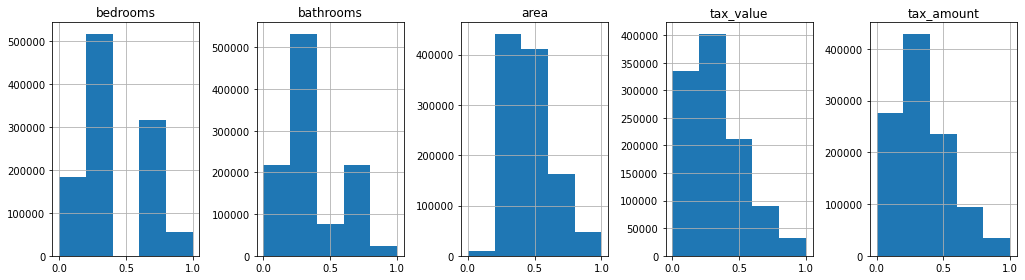

In [5]:
# visualize the data I can do it
wrangle.make_hist(train_minmax)

### Standard Scaler

In [6]:
#create scaler object
scaler = sklearn.preprocessing.StandardScaler()

#fit to data
scaler.fit(train)

# apply
train_standard = pd.DataFrame(scaler.transform(train), index=train.index, columns=train.columns)
validate_standard =  pd.DataFrame(scaler.transform(validate), index=validate.index, columns=validate.columns)
test_standard =  pd.DataFrame(scaler.transform(test), index=test.index, columns=test.columns)

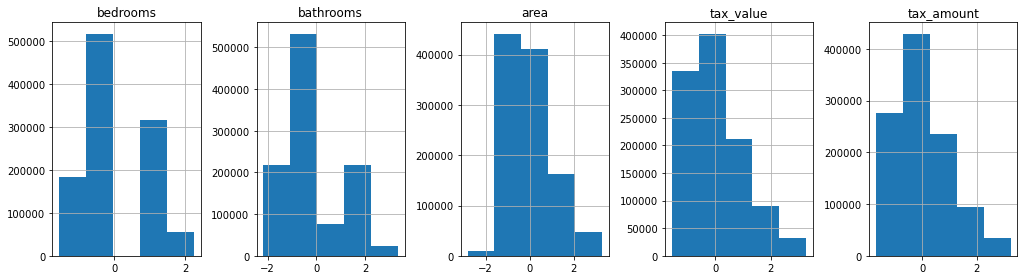

In [7]:
# visualize the data I can do it
wrangle.make_hist(train_standard)

### RobustScaler

In [8]:
#create scaler object
scaler = sklearn.preprocessing.RobustScaler()

#fit to data
scaler.fit(train)

# apply
train_robust = pd.DataFrame(scaler.transform(train), index=train.index, columns=train.columns)
validate_robust =  pd.DataFrame(scaler.transform(validate), index=validate.index, columns=validate.columns)
test_robust =  pd.DataFrame(scaler.transform(test), index=test.index, columns=test.columns)

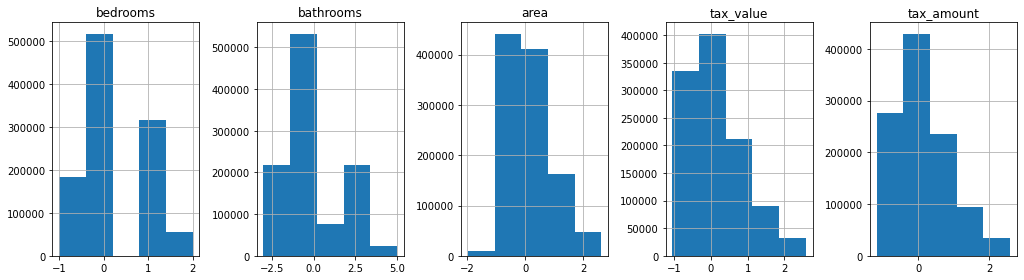

In [9]:
# visualize the data I can do it
wrangle.make_hist(train_robust)

## Apply the .inverse_transform method to your scaled data. 
> Is the resulting dataset the exact same as the original data?
* No it is not. There appears to be some difference in the area, tax_value, and tax_amount columns


In [10]:
inverse_robust = pd.DataFrame(scaler.inverse_transform(train_robust), index=train.index, columns=train.columns)

In [11]:
(inverse_robust == train).sum()

bedrooms      1071302
bathrooms     1071302
area          1065328
tax_value     1047827
year_built    1071302
tax_amount     934853
fips          1071302
dtype: int64

## Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.


In [12]:
#create scaler object
scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

#fit to data
scaler.fit(train)

# apply
train_quantile = pd.DataFrame(scaler.transform(train), index=train.index, columns=train.columns)
validate_quantile =  pd.DataFrame(scaler.transform(validate), index=validate.index, columns=validate.columns)
test_quantiles =  pd.DataFrame(scaler.transform(test), index=test.index, columns=test.columns)

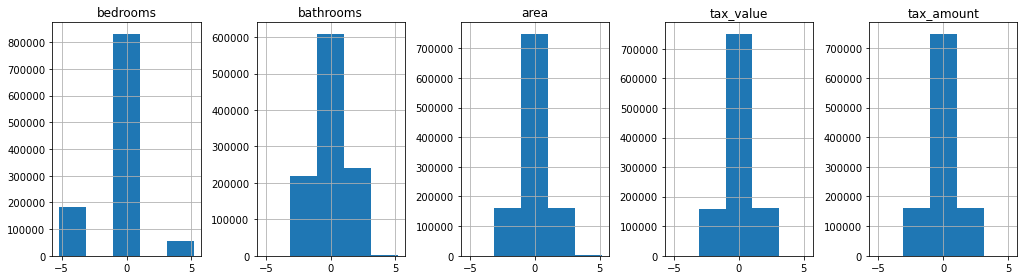

In [13]:
# visualize the data I can do it
wrangle.make_hist(train_quantile)

## Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results.
> What do you notice?
* The area, tax_value, and tax_amount appear almost uniform
* The scale on the x-axis is 0-1
* The vertical scale is much smaller for all categories


In [14]:
#create scaler object
scaler = sklearn.preprocessing.QuantileTransformer()

#fit to data
scaler.fit(train)

# apply
train_quantile = pd.DataFrame(scaler.transform(train), index=train.index, columns=train.columns)
validate_quantile =  pd.DataFrame(scaler.transform(validate), index=validate.index, columns=validate.columns)
test_quantiles =  pd.DataFrame(scaler.transform(test), index=test.index, columns=test.columns)

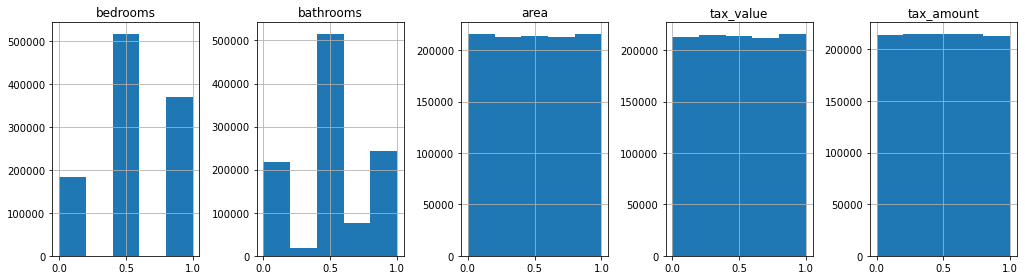

In [15]:
# visualize the data I can do it
wrangle.make_hist(train_quantile)

## Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [17]:
def subset_scaler (train, validate, test):
    """
    Purpose
        Uses sklearn MinMaxScaler to transform Zillow dataset
        Produces histogram of scaled data for continuous columns

    Parameters
        train, validate, test data subsets

    Output
        scaled versions of train, validate, and test data subsets 
    """

    #create scaler object
    scaler = sklearn.preprocessing.MinMaxScaler()

    #fit to data
    scaler.fit(train)

    # apply
    train_minmax = pd.DataFrame(scaler.transform(train), index=train.index, columns=train.columns)
    validate_minmax =  pd.DataFrame(scaler.transform(validate), index=validate.index, columns=validate.columns)
    test_minmax =  pd.DataFrame(scaler.transform(test), index=test.index, columns=test.columns)

    #visualize
    wrangle.make_hist(train_minmax)
        
    return train_minmax, validate_minmax, test_minmax

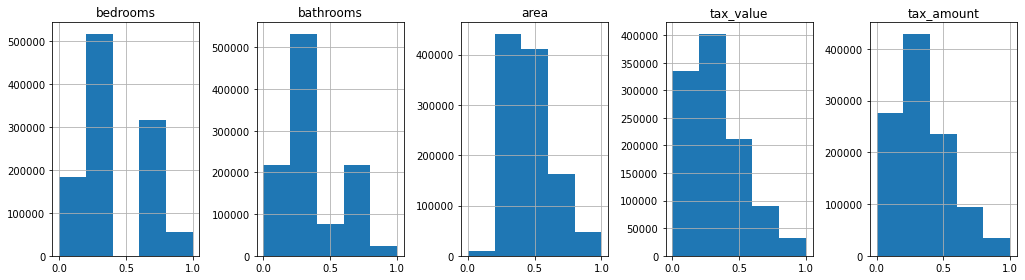

In [18]:
train_scaled, validate_scaled, test_scaled = subset_scaler(train, validate, test)